# Exploratory Data Analysis

To gain an understanding of data and find clues from the data,
- to formulate assumptions and hypothesis for our modelling; and
- to check the quality of data for further processing and cleaning if necessary. \

Tutorial: https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                431732 non-null  object 
 1   town                 431732 non-null  object 
 2   flat_type            431732 non-null  object 
 3   block                431732 non-null  object 
 4   street_name          431732 non-null  object 
 5   storey_range         431732 non-null  object 
 6   floor_area_sqm       431732 non-null  float64
 7   flat_model           431732 non-null  object 
 8   eco_category         431732 non-null  object 
 9   lease_commence_date  431732 non-null  int64  
 10  latitude             431732 non-null  float64
 11  longitude            431732 non-null  float64
 12  elevation            431732 non-null  float64
 13  subzone              431732 non-null  object 
 14  planning_area        431732 non-null  object 
 15  region           

In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0


### Preliminary Proccessing

Modify data types:
- set identifier as String
- set columns that are categorical to "category"
- leave columns that are numeric to "float64" or "int64"
- set date as "datetime64"

In [5]:
# Remove hyphans from flat_type
df['flat_type'] = df['flat_type'].astype('str')

In [6]:
df['flat_type']

0         4 room
1         5-room
2         5 room
3         3 room
4         3-room
           ...  
431727    4 room
431728    4 room
431729    3-room
431730    5-room
431731    4 room
Name: flat_type, Length: 431732, dtype: object

In [7]:
df['flat_type'] = df['flat_type'].apply(lambda x: x.replace('-', ' '))

In [8]:
df['flat_type']

0         4 room
1         5 room
2         5 room
3         3 room
4         3 room
           ...  
431727    4 room
431728    4 room
431729    3 room
431730    5 room
431731    4 room
Name: flat_type, Length: 431732, dtype: object

In [9]:
# set datetime data
df['month'] = pd.to_datetime(df['month'])

In [10]:
# set categorical data
df['town'] = df['town'].astype(str).str.strip().astype('category')
df['flat_type'] = df['flat_type'].astype(str).str.strip().astype('category')
df['storey_range'] = df['storey_range'].astype(str).str.strip().astype('category')
df['flat_model'] = df['flat_model'].astype(str).str.strip().astype('category')
df['eco_category'] = df['eco_category'].astype(str).str.strip().astype('category')
df['planning_area'] = df['planning_area'].astype(str).str.strip().astype('category')
df['region'] = df['region'].astype(str).str.strip().astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                431732 non-null  datetime64[ns]
 1   town                 431732 non-null  category      
 2   flat_type            431732 non-null  category      
 3   block                431732 non-null  object        
 4   street_name          431732 non-null  object        
 5   storey_range         431732 non-null  category      
 6   floor_area_sqm       431732 non-null  float64       
 7   flat_model           431732 non-null  category      
 8   eco_category         431732 non-null  category      
 9   lease_commence_date  431732 non-null  int64         
 10  latitude             431732 non-null  float64       
 11  longitude            431732 non-null  float64       
 12  elevation            431732 non-null  float64       
 13  subzone       

In [12]:
# remove hyphans in flat_type
df_temp = df.iloc[0:100]

In [18]:
df['eco_category'] # remove?

0         uncategorized
1         uncategorized
2         uncategorized
3         uncategorized
4         uncategorized
              ...      
431727    uncategorized
431728    uncategorized
431729    uncategorized
431730    uncategorized
431731    uncategorized
Name: eco_category, Length: 431732, dtype: category
Categories (1, object): ['uncategorized']

In [21]:
df['planning_area'] # planning_area vs town ...

0             pasir ris
1               punggol
2              sengkang
3              clementi
4           bukit batok
              ...      
431727        woodlands
431728         sengkang
431729         tampines
431730         sengkang
431731    choa chu kang
Name: planning_area, Length: 431732, dtype: category
Categories (32, object): ['ang mo kio', 'bedok', 'bishan', 'bukit batok', ..., 'tanglin', 'toa payoh', 'woodlands', 'yishun']

In [22]:
df['town']

0             pasir ris
1               punggol
2              sengkang
3              clementi
4           bukit batok
              ...      
431727        woodlands
431728         sengkang
431729         tampines
431730         sengkang
431731    choa chu kang
Name: town, Length: 431732, dtype: category
Categories (26, object): ['ang mo kio', 'bedok', 'bishan', 'bukit batok', ..., 'tampines', 'toa payoh', 'woodlands', 'yishun']

### Check for Missing values and Duplicates

In [24]:
# generate preview of entries with null values
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:")
    display(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show() # we dont have null values currently

In [25]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  315
            month         town flat_type block            street_name  \
26364  2000-01-01        bedok    4 room   421       Bedok North Road   
399051 2000-01-01        bedok    4 room   421       Bedok North Road   
126599 2000-02-01  jurong east    4 room   219  jurong east street 21   
191922 2000-02-01  jurong east    4 room   219  jurong east street 21   
167422 2000-03-01  bukit batok    3 room   536  bukit batok street 52   

       storey_range  floor_area_sqm      flat_model   eco_category  \
26364      13 to 15            92.0  new generation  uncategorized   
399051     13 to 15            92.0  new generation  uncategorized   
126599     07 to 09            92.0  new generation  uncategorized   
191922     07 to 09            92.0  new generation  uncategorized   
167422     10 to 12            73.0         model a  uncategorized   

        lease_commence_date  latitude   longitude  elevation      subzone  \
26364                  1979  1.

In [26]:
# df.drop_duplicates(inplace=True) # drop duplicates?

### Categorical Data

In [28]:
print("To check: Unique count of non-numeric data")
print(df.select_dtypes(include=['category']).nunique())

To check: Unique count of non-numeric data
town             26
flat_type         7
storey_range     25
flat_model       20
eco_category      1
planning_area    32
region            5
dtype: int64


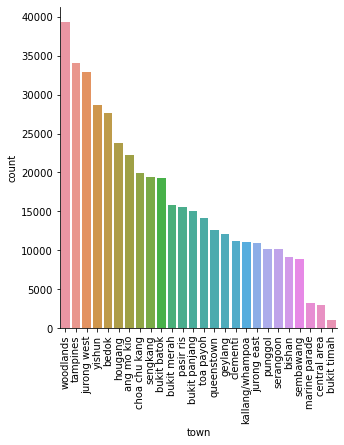

In [35]:
# Town
fig = sns.catplot(x="town", kind="count", data=df, order=df['town'].value_counts().index)
fig.set_xticklabels(rotation=90)
plt.show()

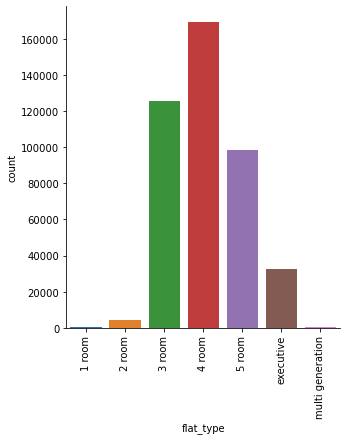

In [29]:
# Flat Type
fig = sns.catplot(x="flat_type", kind="count", data=df)
fig.set_xticklabels(rotation=90)
plt.show()

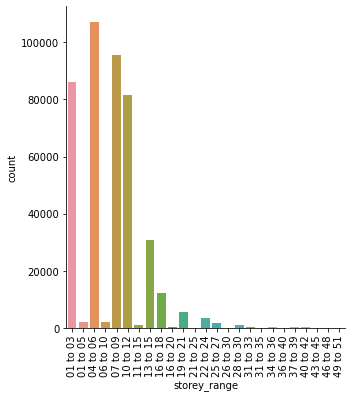

In [36]:
# Storey range
fig = sns.catplot(x="storey_range", kind="count", data=df)
fig.set_xticklabels(rotation=90)
plt.show()

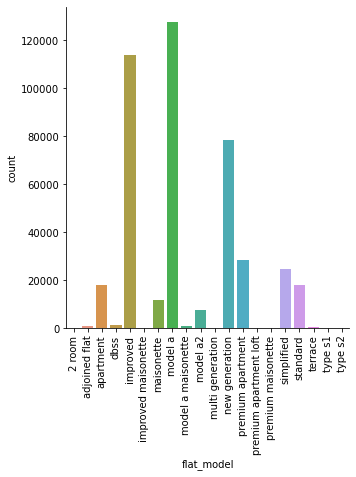

In [37]:
# Flat model
fig = sns.catplot(x="flat_model", kind="count", data=df)
fig.set_xticklabels(rotation=90)
plt.show()

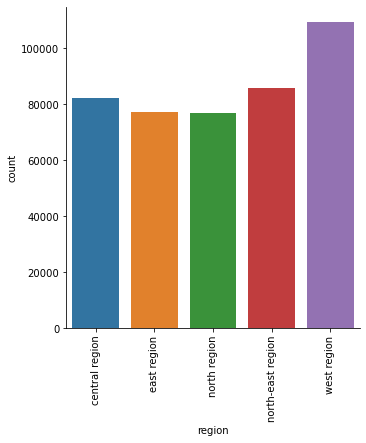

In [38]:
# Region
fig = sns.catplot(x="region", kind="count", data=df)
fig.set_xticklabels(rotation=90)
plt.show()

### Numerical Data

In [40]:
print("\nTo check: \nDistribution of numeric data")
display(df.describe().T)


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,431732.0,96.970064,25.190664,31.000000,74.000000,99.000000,114.000000,2.800000e+02
lease_commence_date,431732.0,1989.421004,10.254055,1966.000000,1983.000000,1988.000000,1997.000000,2.019000e+03
latitude,431732.0,1.364939,0.042829,1.270380,1.336154,1.358958,1.389004,1.457071e+00
longitude,431732.0,103.836492,0.073527,103.685228,103.772439,103.840160,103.895779,1.039878e+02
elevation,431732.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
resale_price,431732.0,301819.588443,129862.345928,29700.000000,205200.000000,283950.000000,373500.000000,1.123200e+06


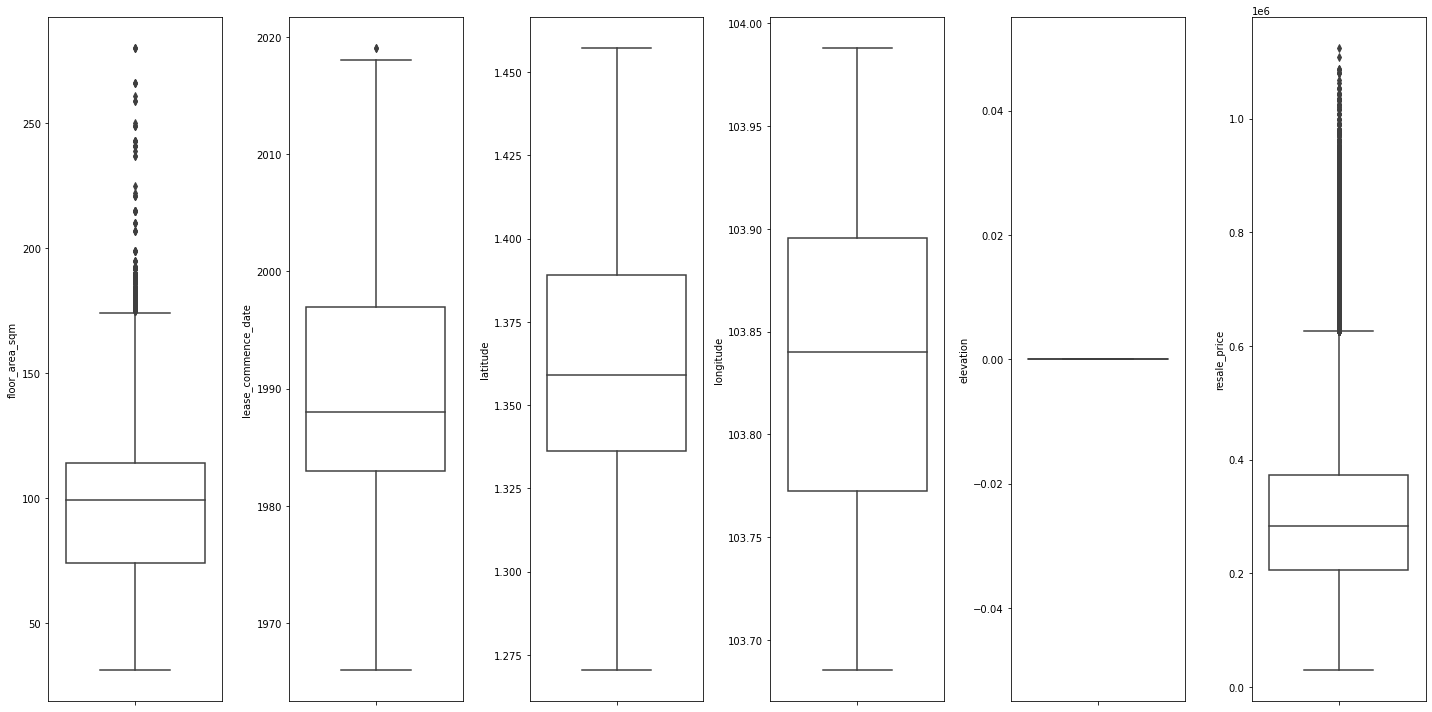

In [42]:
columns = df.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(20, 10))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
    sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
figure.tight_layout()
plt.show()

- remove elevation?
- remove outliers?

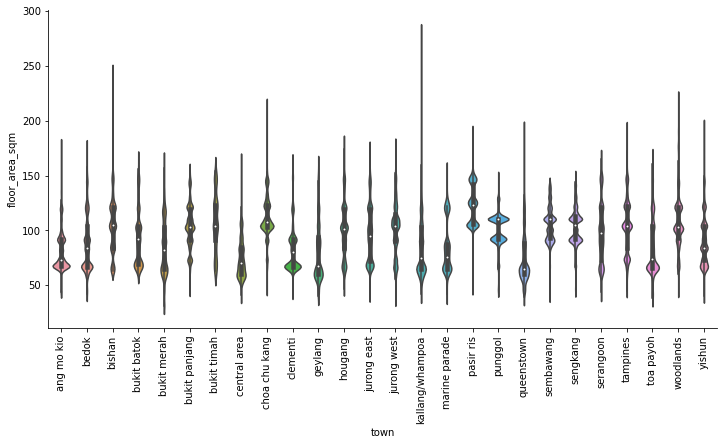

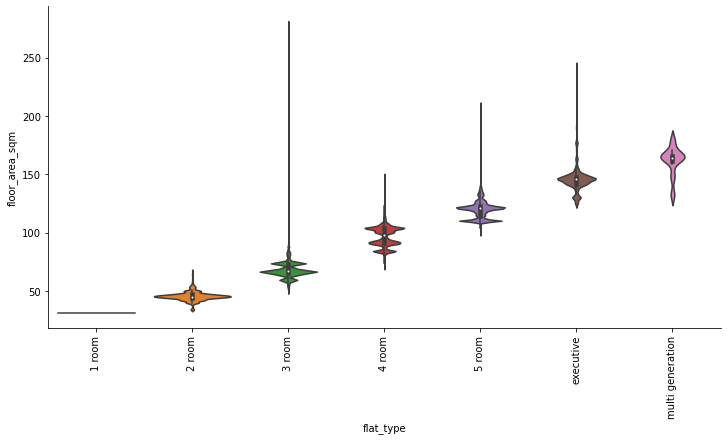

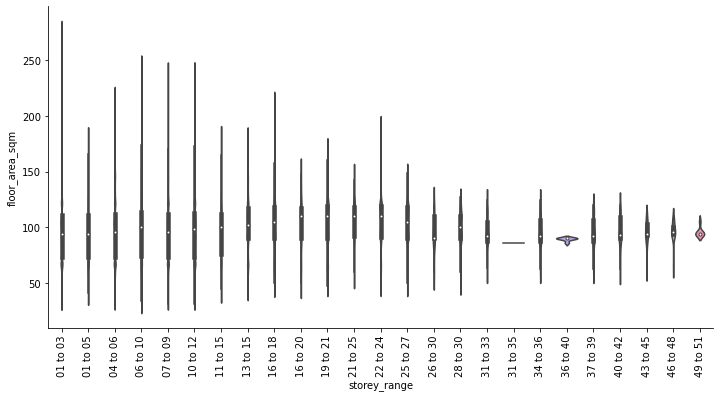

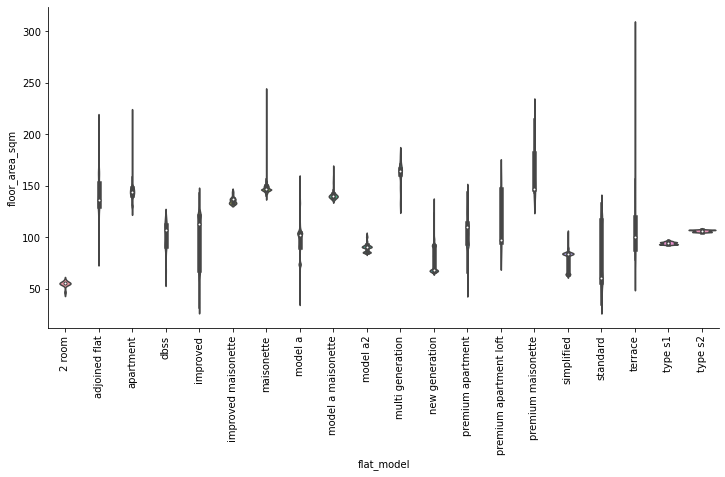

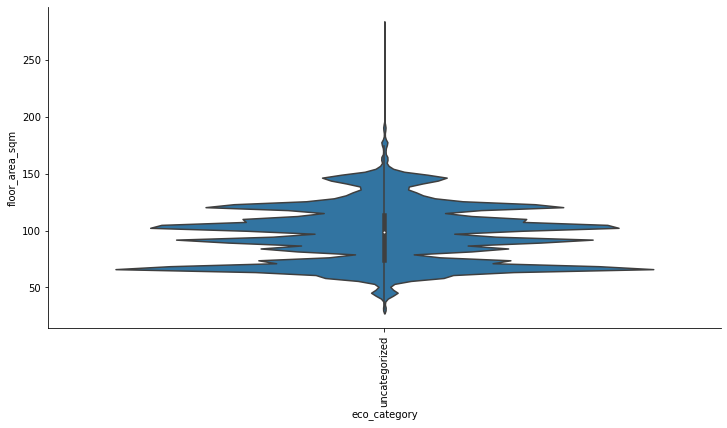

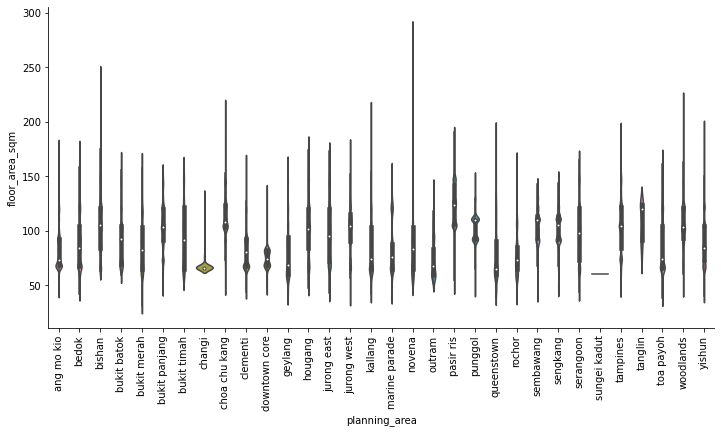

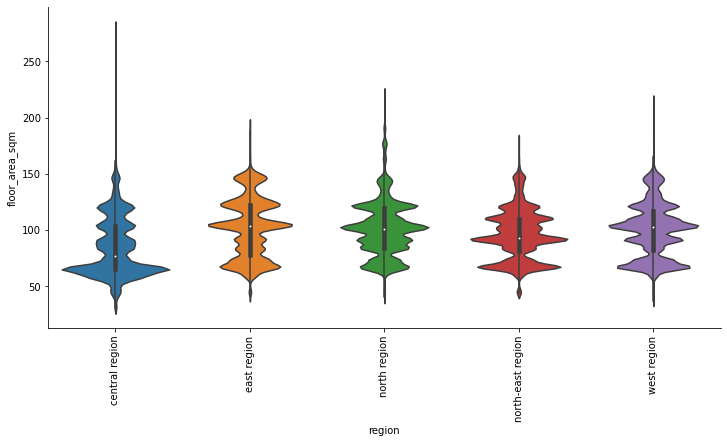

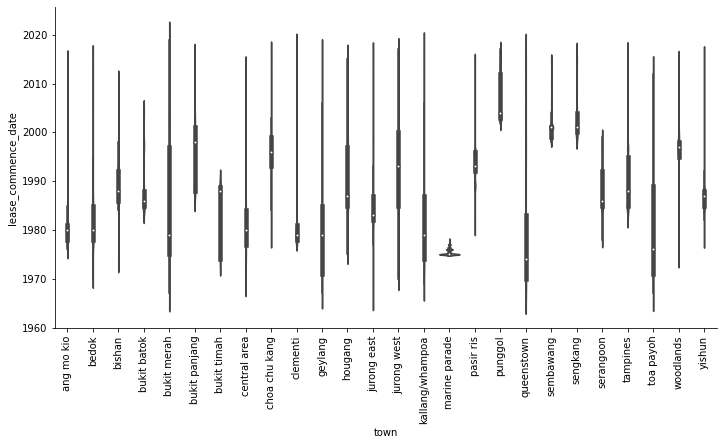

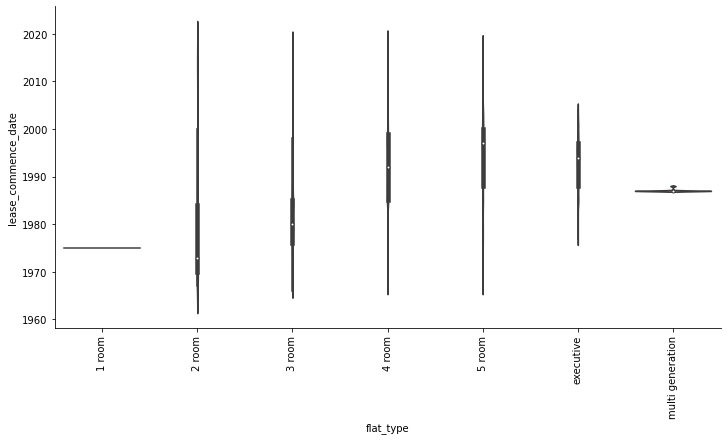

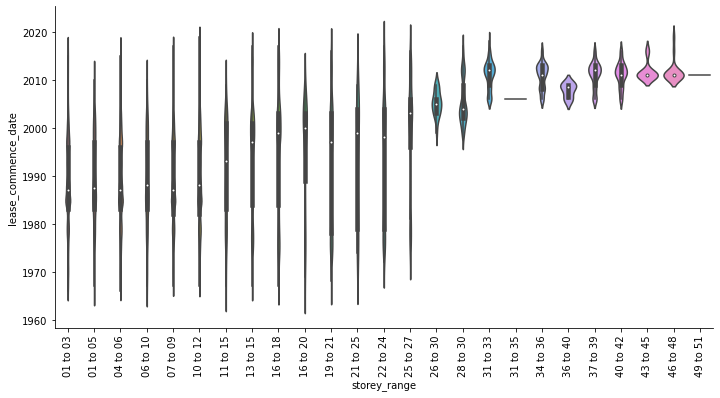

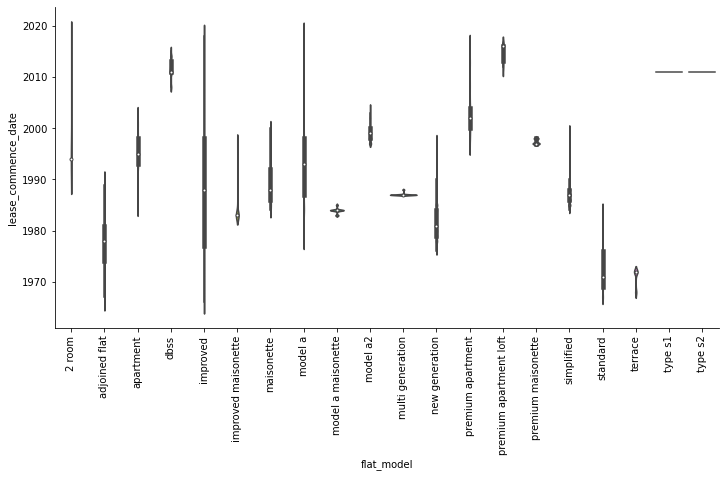

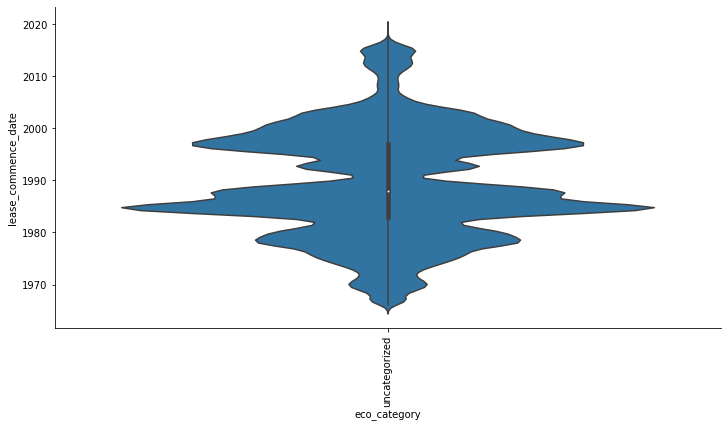

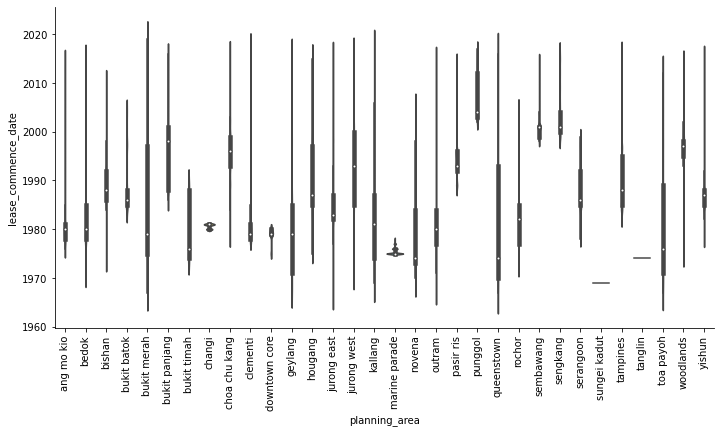

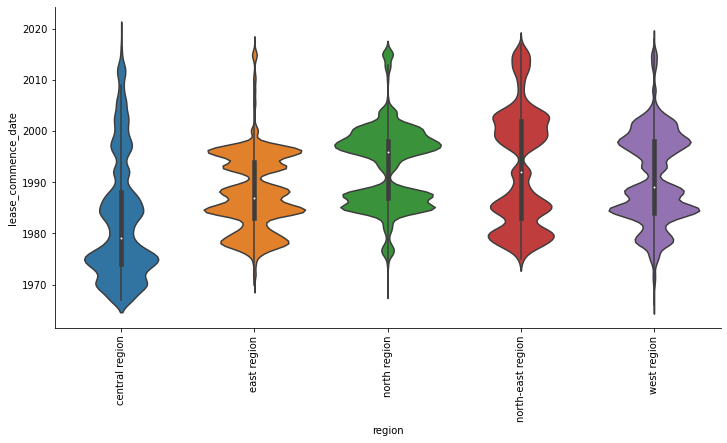

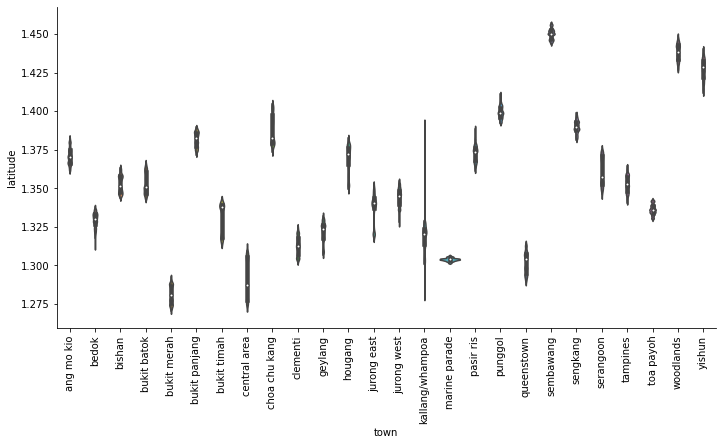

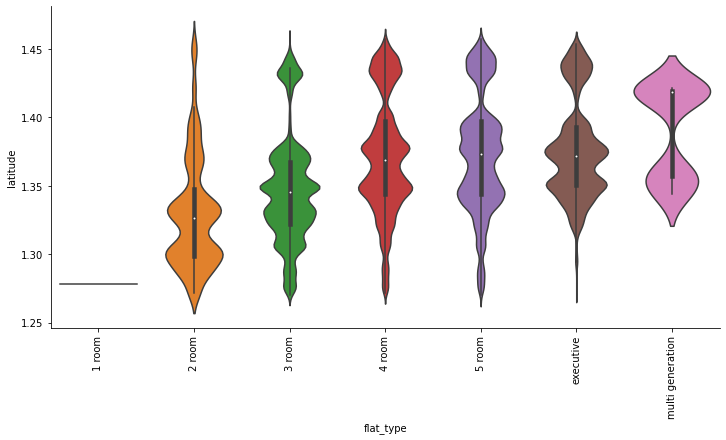

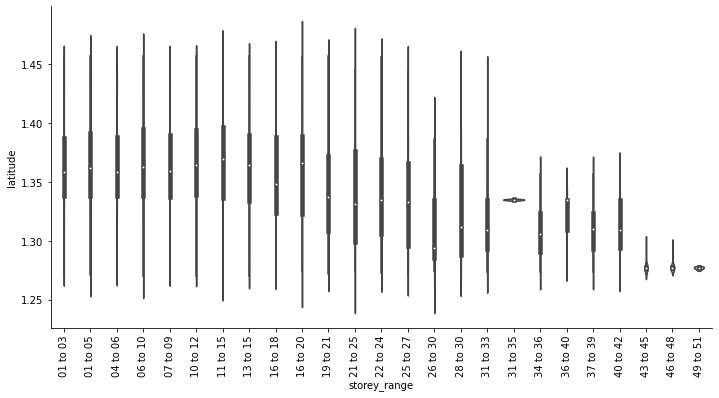

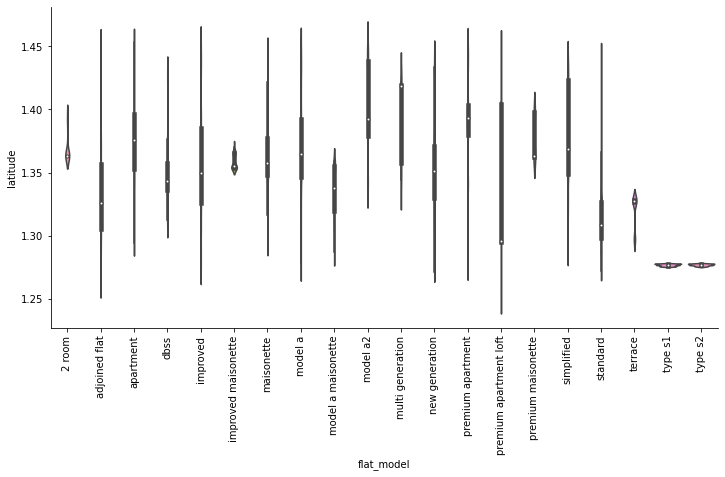

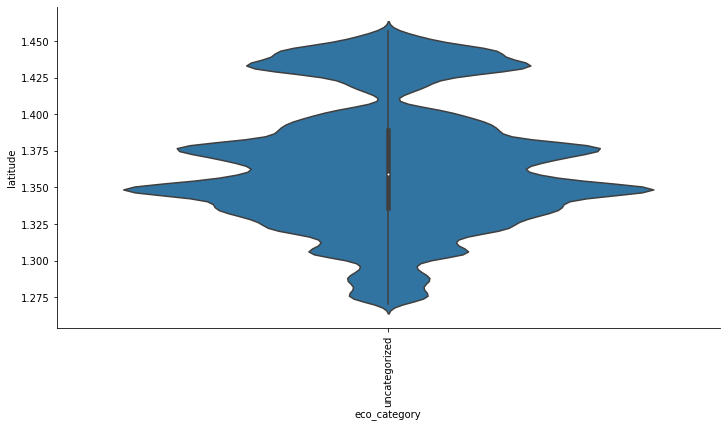

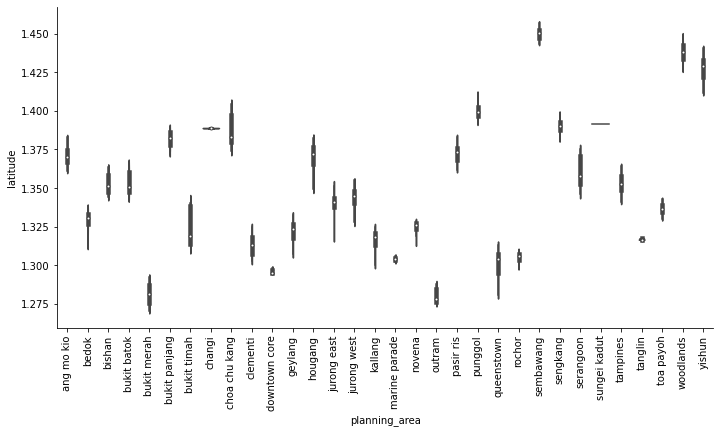

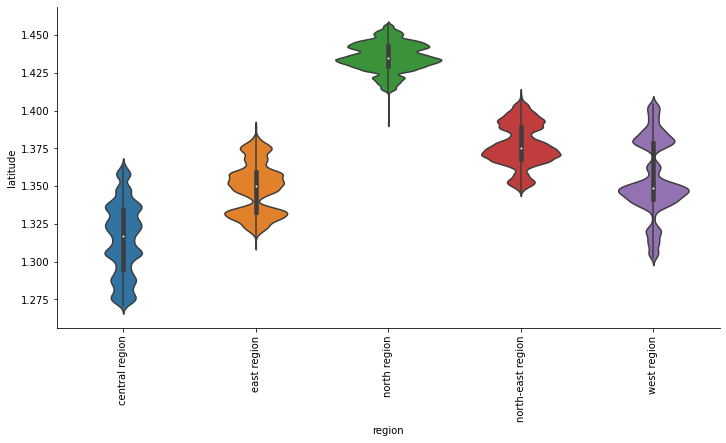

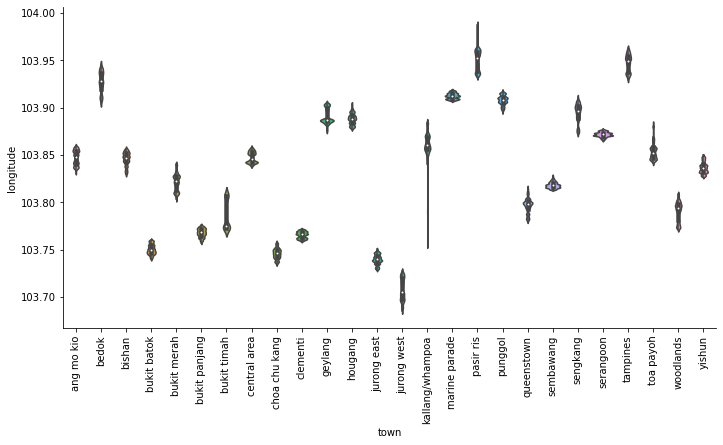

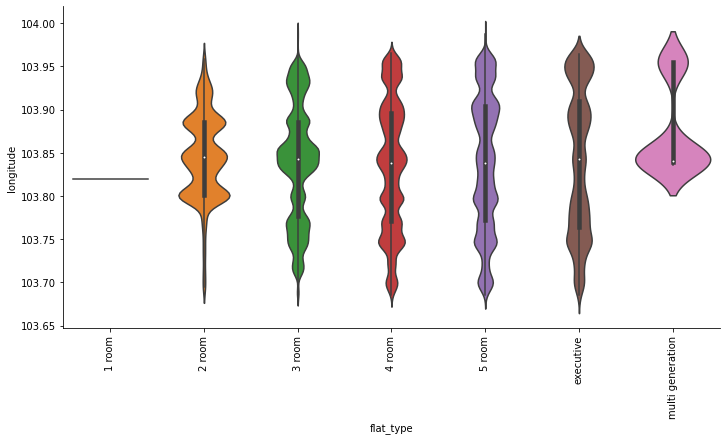

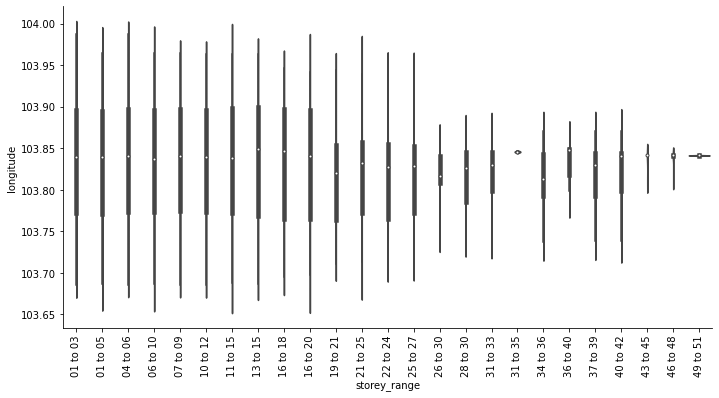

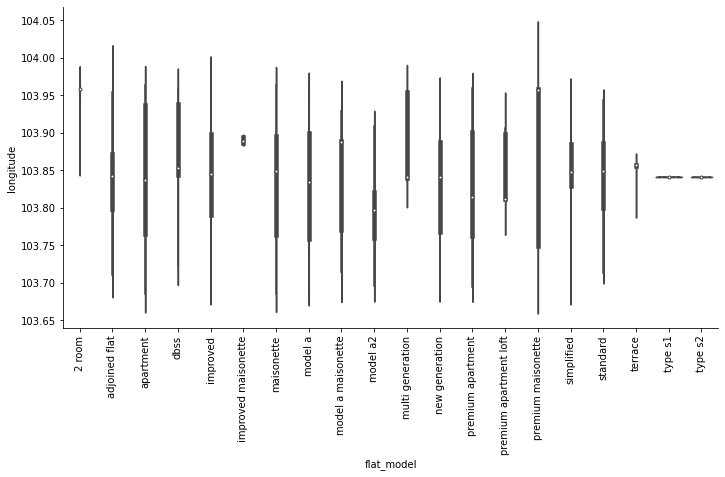

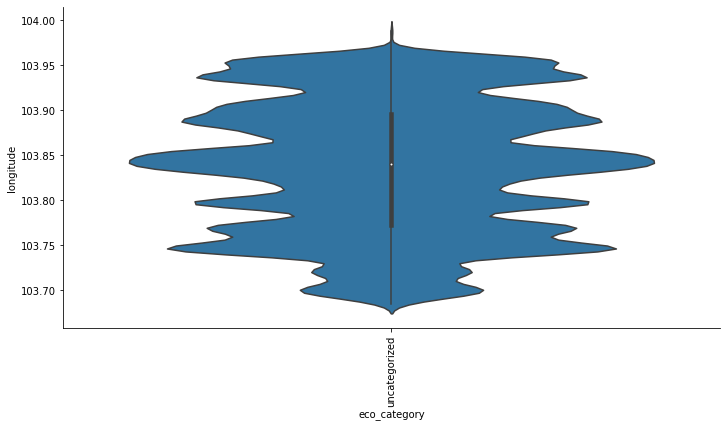

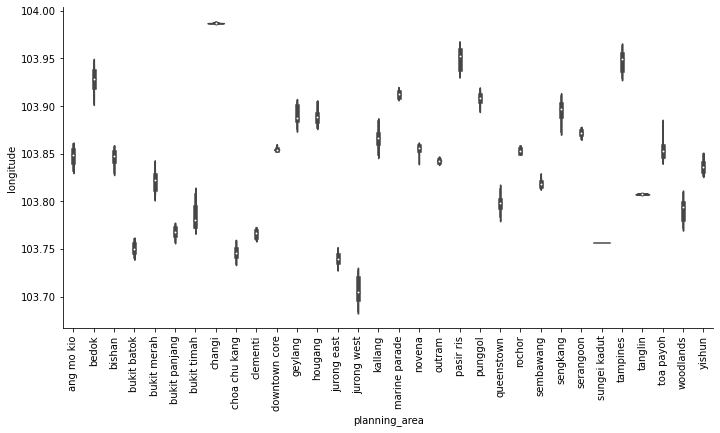

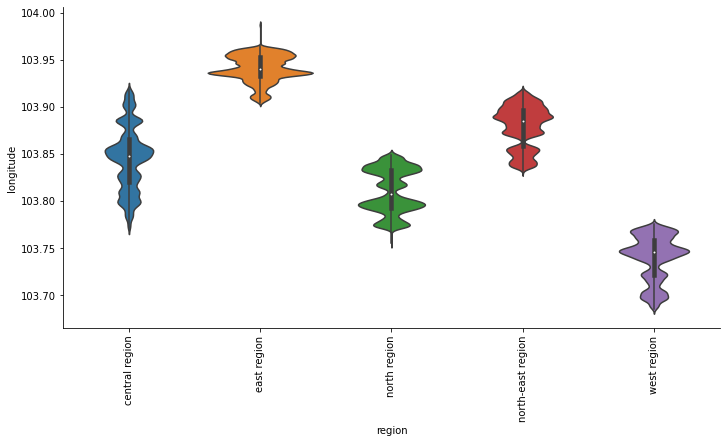

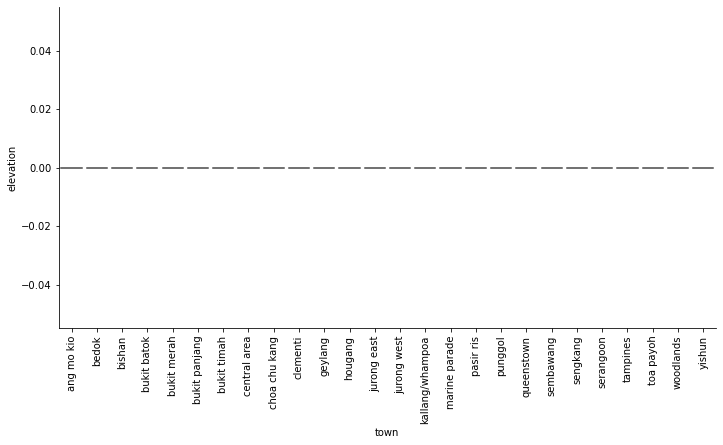

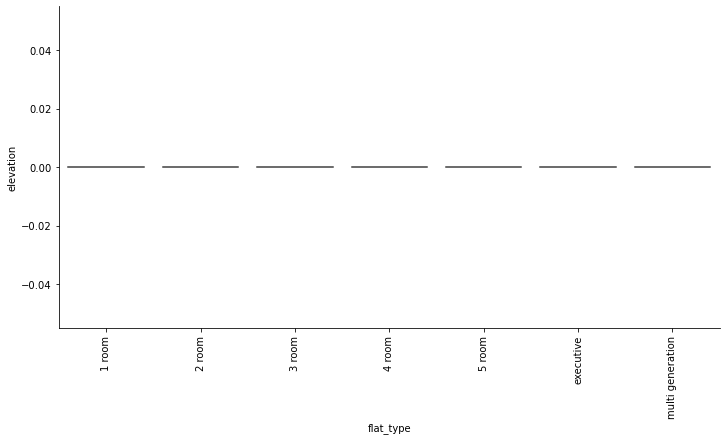

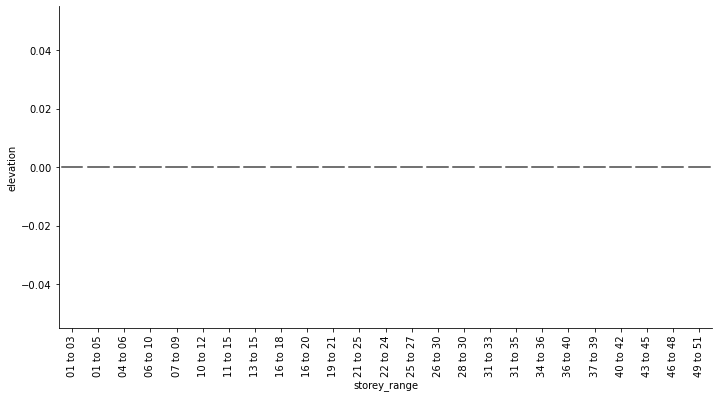

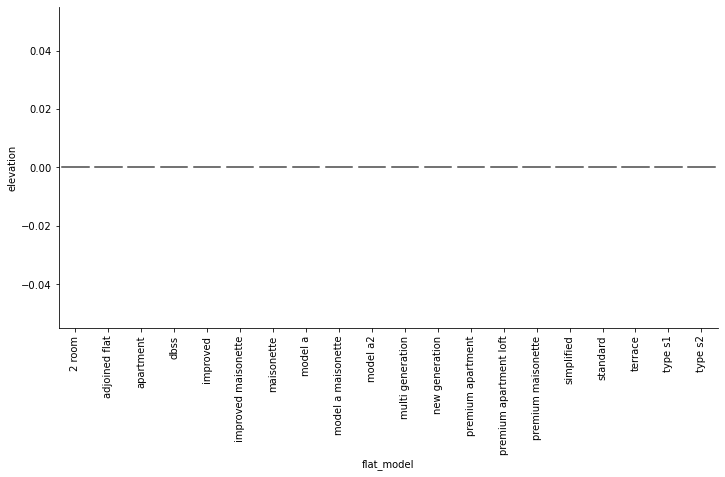

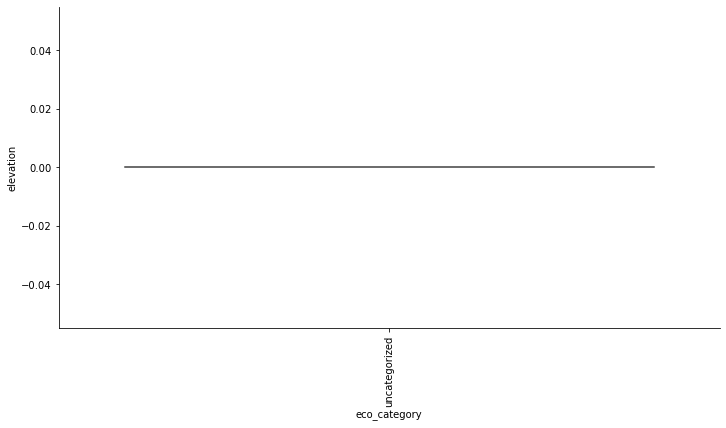

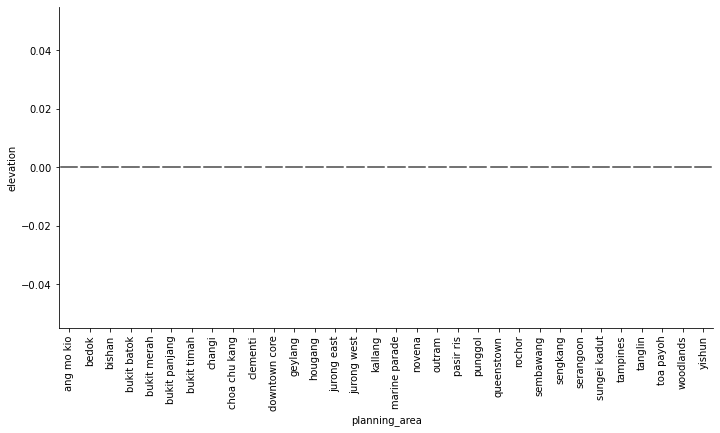

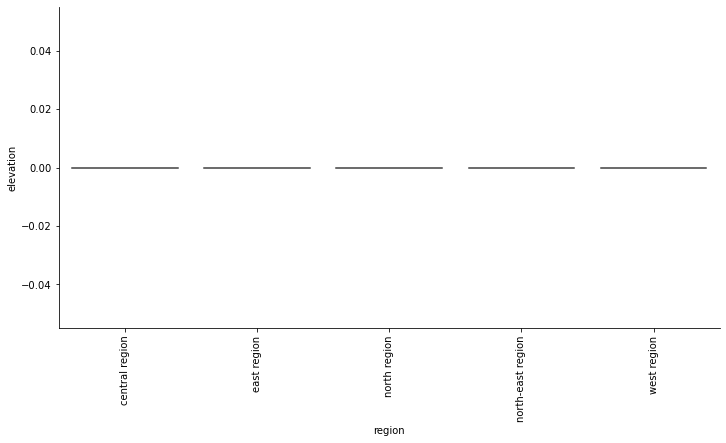

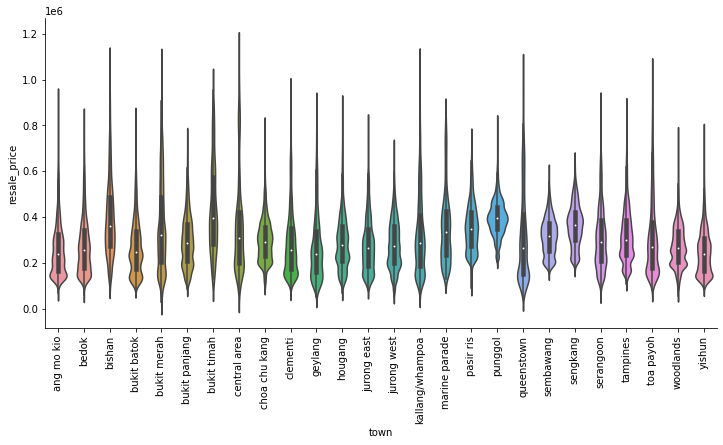

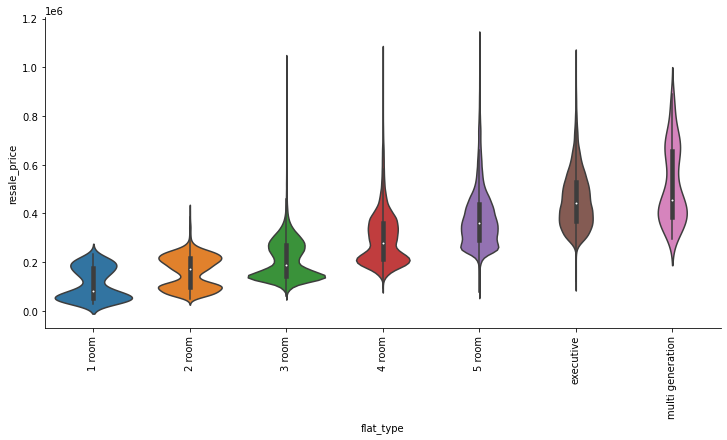

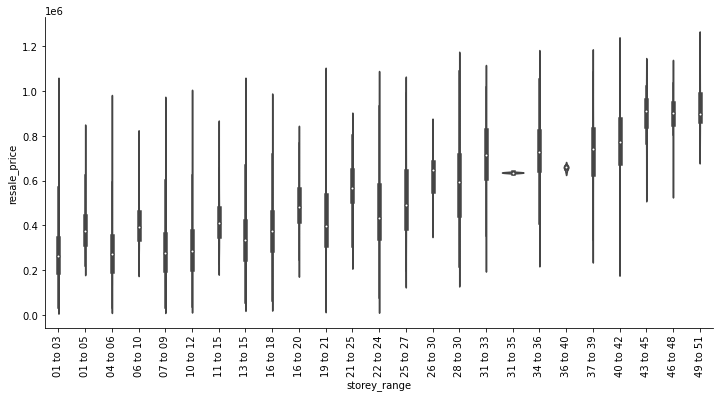

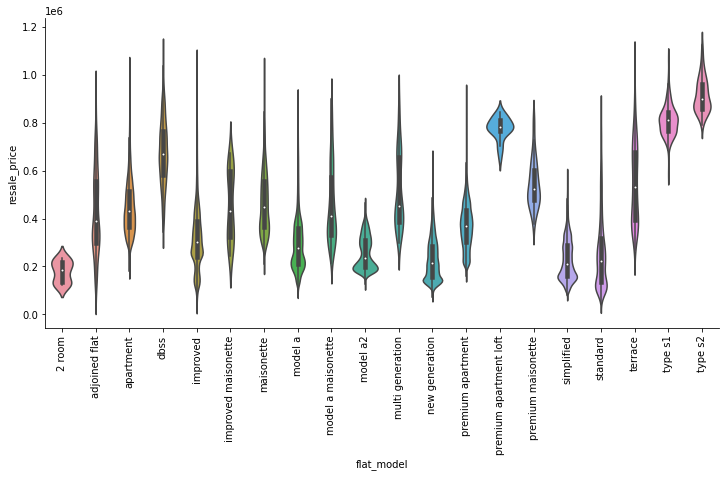

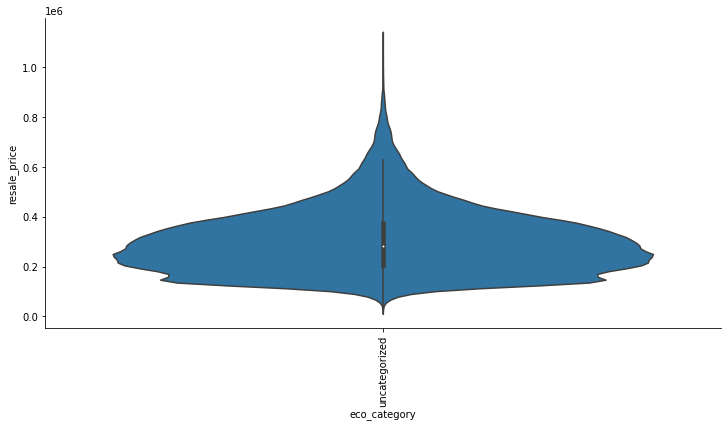

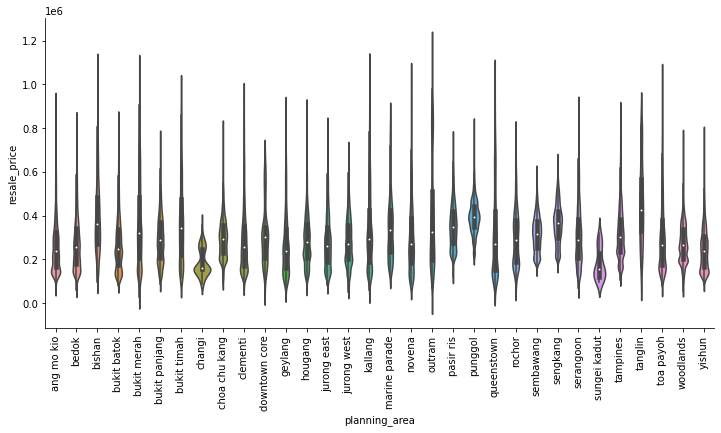

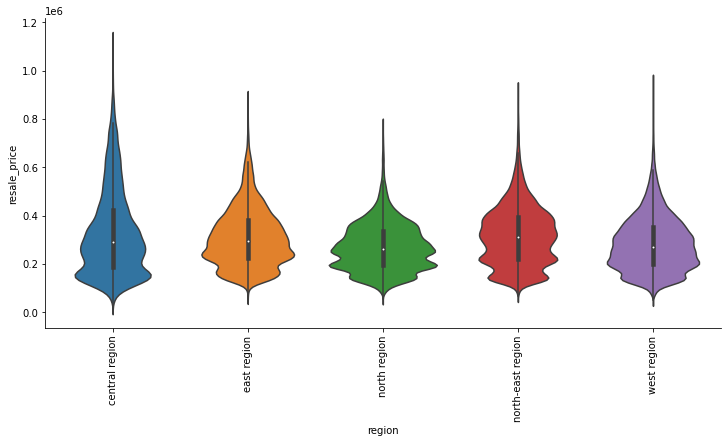

In [43]:
# Numerical against categorical variables
if len(df.select_dtypes(include='category').columns) > 0:
    for col_num in df.select_dtypes(include=np.number).columns:
        for col in df.select_dtypes(include='category').columns:
            fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
            fig.set_xticklabels(rotation=90)
            plt.show()

In [45]:
del df['elevation']

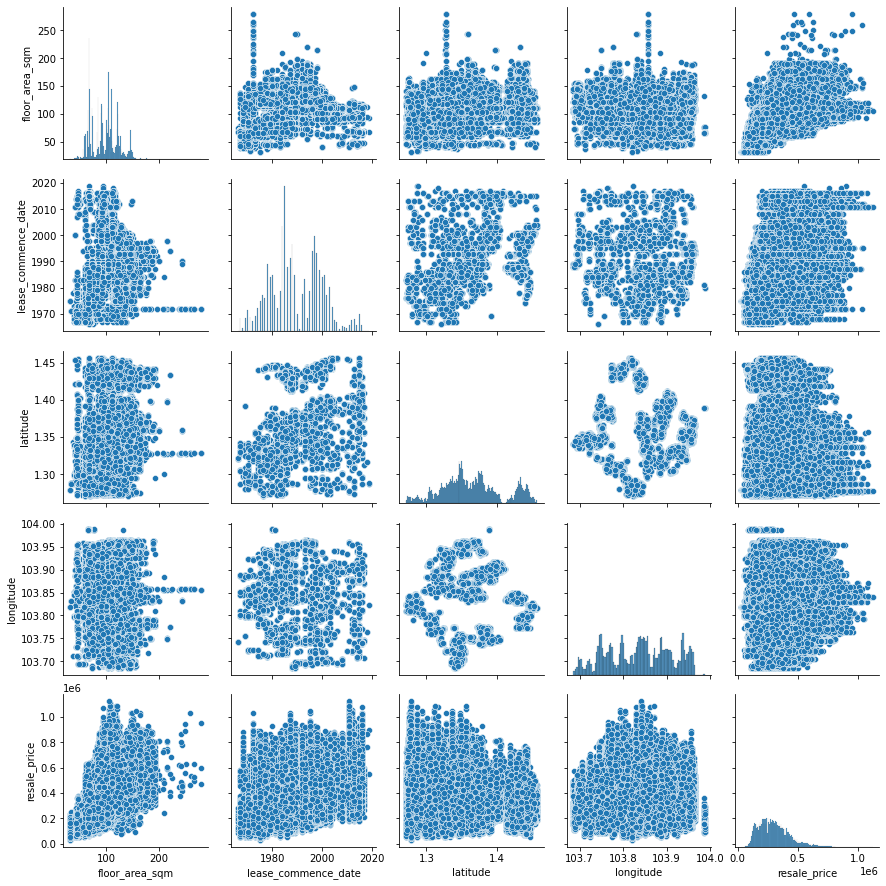

In [46]:
# Pairwise joint distribution
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

To complete:
- EDA
- Data cleaning and processing + other datasets?
- brainstorm on possible models to use for regression